In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

##Model 1 : RFM Segmentation of customers based on recency, frequency, and monetary values of purchases## 

In [ ]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import calendar

**DATA PRE-PROCESSING**

**TRANSACTIONS DATASET**

In [ ]:
transactions=pd.read_excel('/content/drive/MyDrive/Major_Project/customer_segmentation_raw.xlsx', sheet_name='Transactions')
transactions.head()

In [ ]:
transactions.info()

Thus, we can conclude that there are some missing datas in transactions dataframe, which need to be dealt with

The general information about the dataframe points out to several problems:

*   list price,standard cost columns are stored as object, where in fact it should be numeric.
*   The Transactions date column should be converted into datetime columns not object

*   Transaction date column should have year,month name,day,day name columns online_order,brand, product line,product class,product size,standard cost and product_first_sold_date have missing values.

**Counting the number and percentage of missing data**

In [ ]:
count_missing_transactions_data = transactions.isnull().sum()
percent_missing_Transactions = round(transactions.isnull().sum()/len(transactions) * 100, 1)
missing_transactions_data= pd.concat([count_missing_transactions_data, percent_missing_Transactions], axis = 1)
missing_transactions_data.columns = ["Missing_data(count)", "Missing_data(%)"]
missing_transactions_data

From the above cell, we can see that there is 1.8% of missing data in online_order and 1% of missing datas in brand, product_line, product_class, product_size, standard_cost, and product_first_sold_date

**Dealing With Missing Data :**
There are some strategies for filling the missing data values like :


1.   Filling missing data with mean
2.   Filling missing data for median
3.   Filling with mode
4.   Dropping the entire row if it does not affect our analysis

In [ ]:
# Filling the online_order column with mode value
transactions['online_order'] = transactions['online_order'].fillna(transactions['online_order'].mode()[0])

In [ ]:
# Dropping the remaining data rows with null values
transactions.dropna(axis=0, inplace=True)
transactions.head()

In [ ]:
# Checking for total number of null values after removing them
transactions.isna().sum()

Thus, all the null values are either removed or processed.

In [ ]:
# Checking for the datatypes of the column variables
transactions.dtypes

In [ ]:
# Ammending the datatypes of columns 'list_price' and 'standard_cost' to numeric and 'transaction_date' to datetime
transactions['list_price']=pd.to_numeric(transactions['list_price'])
transactions['standard_cost']=pd.to_numeric(transactions['standard_cost'])
transactions['transaction_date']=pd.to_datetime(transactions['transaction_date'])

In [ ]:
transactions.info()

**Checking for Duplicated Rows**

In [ ]:
transactions[transactions.duplicated()]

Thus, there are no duplicate rows in the Transactions dataframe

In [ ]:
# Storing the categorical columns into list
categorical_columns=[]
for i in transactions.dtypes.index:
  if transactions.dtypes[i]=='object':
    categorical_columns.append(i)
categorical_columns

In [ ]:
# Checking the unique values present in each categorical column
for items in categorical_columns:
  print(items)
  print(transactions[items].unique())
  print('#########################')
  print()


product_first_sold_date is in float, we should convert it to datetime

In [ ]:
#applying the datetime function on the date transactions
transactions['product_first_sold_date']=pd.to_datetime(transactions['product_first_sold_date'])
transactions.head()

In [ ]:
transactions_copy=transactions.copy()

**FEATURE ENGINEERING**

Extracting transaction year, month of transaction, day of transaction, and the day of the week when transaction was made from transaction date.

In [ ]:
transactions['transaction_year']=transactions['transaction_date'].dt.year
transactions['transaction_month']=transactions['transaction_date'].dt.month_name()
transactions['transaction_day']=transactions['transaction_date'].dt.day
transactions['day_of_the_week']=transactions['transaction_date'].dt.day_name()

In [ ]:
# converting the transaction year , day columnes into string columns
transactions['transaction_year']=transactions['transaction_year'].astype(str)
transactions['transaction_day']=transactions['transaction_day'].astype(str)
transactions.head()

Thus, Transactions Dataset is cleaned and processed and is ready for analysis

**Data Pre-Processing of Customer Demographics Dataset**

In [ ]:
demographic=pd.read_excel('/content/drive/MyDrive/Major_Project/customer_segmentation_raw.xlsx', sheet_name='CustomerDemographic')
demographic.head()

In [ ]:
# Checking the information about Customer Demographics Dataset
demographic.info()

Thus, there are some missing(null) values in the dataset last_name,DOB,job_title,job_industry_category,default,tenure

**Counting the number and percentage of missing data**

In [ ]:
count_missing_demographic_data = demographic.isnull().sum()
percent_missing_Demographic = round(demographic.isnull().sum()/len(demographic) * 100, 1)
missing_demographic_data= pd.concat([count_missing_demographic_data, percent_missing_Demographic], axis = 1)
missing_demographic_data.columns = ["Missing_data_demographic(count)", "Missing_data_demographic(%)"]
missing_demographic_data

**FEATURE ENGINEERING**

**Dealing with Missing Data**

All of the columns are categorical columns so either we will fill in the null values with the mode of these columns or we will drop the column entirley if the missing percentage is high

*   **last_name**: has just 3.1% missing values, so we fill nulls with mode
*   **DOB**: has 2.2% so we fill nulls with mode
*   **job_title**: has 12.6% we will fill these values with mode
*   **default**: has 7.6% so we fill nulls with mode
*   **Tenure**: has 2.2% missing from the column so we will fill it with mean

In [ ]:
#Filling the columns with null values with mode 
demographic['last_name'] = demographic['last_name'].fillna(demographic['last_name'].mode()[0])
demographic['DOB'] = demographic['DOB'].fillna(demographic['DOB'].mode()[0])
demographic['job_title'] = demographic['job_title'].fillna(demographic['job_title'].mode()[0])
demographic['job_industry_category'] = demographic['job_industry_category'].fillna(demographic['job_industry_category'].mode()[0])
demographic['default'] = demographic['default'].fillna(demographic['default'].mode()[0])
demographic['tenure'] = demographic['tenure'].fillna(demographic['tenure'].mean())

In [ ]:
# Checking for duplicated rows in the dataset 
demographic[demographic.duplicated()]

Thus, there are no duplicate rows in CustomerDemographics Dataset

In [ ]:
# Saving the categorical columns of the dataset in list

categorical_columns=[]
for items in demographic.dtypes.index:
  if demographic[items].dtypes=='object':
    categorical_columns.append(items)
categorical_columns

In [ ]:
# Checking the unique values present in each categorical column
for items in categorical_columns:
  print(items)
  print(demographic[items].unique())
  print('#########################')
  print()


There is ambiguity in values of gender column:
*   Replacing F, Femal with Female
*   Replacing M, with Male.
These two replacements are done to remove ambiguity.

In [ ]:
demographic.replace({'gender':{'F':'Female','Femal':'Female','M':'Male', 'U':'Unknown'}},inplace=True)

In [ ]:
demographic.gender.unique()

In [ ]:
# Counting the total number of each unique value in gender column

demographic['gender'].value_counts()

Default column contains inconsistent values. Nothing can be interpreted from the default column. So, there is a need to drop the default column

In [ ]:
# Dropping the default column

demographic.drop('default', axis=1, inplace=True)
demographic.head()

In [ ]:
demographic_copy=demographic.copy()

Thus, the default column is dropped.

**FEATURE ENGINEERING**

Feature Engineering is performed on DOB column:
*   Extracting the age from DOB column

In [ ]:
# This function converts given date to age
def from_dob_to_age(born):
    today = dt.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [ ]:
#applying the function on the DOB column
demographic['Age']=demographic['DOB'].apply(lambda x: from_dob_to_age(x))

Since, we have already created age column from DOB column, there is no need of DOB column any more. So, we can drop DOB column.

In [ ]:
demographic.drop(columns='DOB', axis=1, inplace=True)
demographic.head()

In [ ]:
demographic.info()

Thus, the CustomerDemographics dataset is cleaned, processed, and is ready for further analysis.

**DATA PRE-PROCESSING**

**CustomerAddress Dataset**

In [ ]:
address=pd.read_excel('/content/drive/MyDrive/Major_Project/customer_segmentation_raw.xlsx', sheet_name='CustomerAddress')
address.head()

In [ ]:
address['state'].value_counts()

In [ ]:
address['state'] = np.where(address['state']=='New South Wales', 'NSW', address['state'])  # convert "New South Wales" to "NSW"
address['state'] = np.where(address['state']=='Victoria', 'VIC', address['state'])   # convert "Victoria" to "VIC"
# check again, problem solved
address['state'].value_counts()

In [ ]:
# Checking the information about address dataset
address.info()

Thus, there are no null values present in the dataframe

In [ ]:
# Checking for presence of duplicated rows in the dataframe
address[address.duplicated()]

Thus, there are no duplicated rows in address dataframe

In [ ]:
# Saving the categorical columns of the dataset in list

categorical_columns=[]
for items in address.dtypes.index:
  if address[items].dtypes=='object':
    categorical_columns.append(items)
categorical_columns

In [ ]:
# Checking the unique values present in each categorical column
for items in categorical_columns:
  print(items)
  print(address[items].unique())
  print('#########################')
  print()


In [ ]:
address_copy=address.copy()

**Country**: Country column represents one value only which is Australia so we will remove it since it will not be helpful in our analysis

In [ ]:
# Removing country column from address dataset
address.drop(columns='country', axis=1, inplace=True)
address.head()

Country column is thus dropped

In [ ]:
# joining Transactions with customer demographics datasets
transactions_demographic=transactions.merge(demographic,on='customer_id',how='inner')
transactions_demographic.head()

**Merging the three processed datasets into a single dataset for further analysis**

In [ ]:
# merging customerdemographics and transactions datasets with addresses dataset into a DTA datasets (Demographics,Transcations,Addresses)
DTA=transactions_demographic.merge(address,on='customer_id',how='inner')
DTA.head()

In [ ]:
# Checking the information about the newly merged dataset
DTA.info()

In [ ]:
# Converting data to a csv file
DTA.to_csv('/content/drive/MyDrive/Major_Project/Data_Wrangling.csv')

**MODULE 2 : EXPLORATORY DATA ANALYSIS AND MODEL DEVELOPMENT**

In [ ]:
DTA=pd.read_csv('/content/drive/MyDrive/Major_Project/Data_Wrangling.csv')
DTA.head()

We will be dropping the Unnamed column as it will be of no use for our analysis.

In [ ]:
DTA.drop('Unnamed: 0',axis=1,inplace=True)
DTA.head()

# Unnamed column is thus dropped

In [ ]:
# Checking the information about the joined dataset
DTA.info()

General information states out to some observations:

*   transaction_id,product_id,customer_id,postcode,Transaction_day, Transaction_year columns are stated as int where they should be str type
*   Transaction_date column are stated as object where they should be datetime type
*   we will construct an Age group column to specify the age groups of customers who are mostly interested in purchasing products.

In [ ]:
# ammending column data types
DTA['transaction_id']=DTA['transaction_id'].astype(str)
DTA['product_id']=DTA['product_id'].astype(str)
DTA['customer_id']=DTA['customer_id'].astype(str)
DTA['postcode']=DTA['postcode'].astype(str)
DTA['transaction_day']=DTA['transaction_day'].astype(str)
DTA['transaction_year']=DTA['transaction_year'].astype(str)
DTA['transaction_date']=pd.to_datetime(DTA['transaction_date']) 

**Construction of Age Group Column**

In [ ]:
# Minimum age
DTA['Age'].min()

In [ ]:
# Maximum age
DTA['Age'].max()

In [ ]:
# Dividing the age groups into aging buckets
DTA['Age_group'] = pd.cut(DTA.Age, bins = [18,30,50,70,90], labels= ['18-30','31-50','51-70','71-90'])
DTA.head()

Objectives for conducting this research are:
*   to find trends and similar patterns in the data 
*   Finding the age group of customers that has the highest customer value.

**List price**, **Standard cost**, **past_3_years_bike_related_purchases**, **Age**, **transaction_month**, **day_of_the_week**, **wealth segment**, **state**, **Gender** are the features that will be helping us with our further analysis

In [ ]:
# Numerical description of the DTA dataframe
DTA.describe()

**Univariate Analysis**

In this type of analysis we will be studying the distribution of individual variables.

We will be also taking care of outliers and try to remove them for better accuracy.

In [ ]:
# Product distribution by list prices
plt.figure(figsize=(9,6))
sns.histplot(data=DTA,x='list_price', color='yellow');
plt.axvline(x=DTA['list_price'].mean(), color = "red");
plt.title("Distribution of products in terms of list prices")
plt.xlabel('Price in Dollars')
plt.ylabel('Count')
plt.show()

In [ ]:
# Finding the mean list price
DTA['list_price'].mean()

**Observation from Price Distribution graph :** The price distribution with respect to list prices is normally distributed and has no outliers.

In [ ]:
# Product distribution by standard costs
plt.figure(figsize=(9,6))
sns.histplot(data=DTA,x='standard_cost', color='yellow');
plt.axvline(x=DTA['standard_cost'].mean(), color = "red");
plt.title("Distribution of products in terms of Standard cost")
plt.xlabel('Standard Cost in Dollars')
plt.ylabel('Count')
plt.show()

In [ ]:
# Mean Standard Cost
DTA['standard_cost'].mean()

**Observation from standard_cost price distribution graph :** The product distribution with respect to standard costs is positively skewed and has outliers.

In [ ]:
# Distribution of Age
plt.figure(figsize=(9,6))
sns.histplot(data=DTA,x='Age', color='yellow');
plt.axvline(x=DTA['Age'].mean(), color = "red");
plt.title("Age Distribution")
plt.xlabel('Ages')
plt.ylabel('Count')
plt.show()

In [ ]:
# Calculation of mean age
DTA['Age'].mean()

**Observation from Age Distribution graph :** The age distribution is more or less normal with a few outliers at 80 and between 80 to 90. The mean age of customers is 44.62

In [ ]:
# Distribution of past_3_years_bike_related_purchases
plt.figure(figsize=(9,6))
sns.histplot(data=DTA,x='past_3_years_bike_related_purchases', color='yellow');
plt.axvline(x=DTA['past_3_years_bike_related_purchases'].mean(), color = "red");
plt.title("Distribution of past_3_years_bike_related_purchases")
plt.xlabel('past_3_years_bike_related_purchases')
plt.ylabel('Count')
plt.show()

In [ ]:
#Calculating mean of past_3_years_bike_related_purchases
DTA['past_3_years_bike_related_purchases'].mean()

**Observation from past_3_years_bike_related_purchases distribution graph :** The graph is normally distributed with mean purchases as 48.93 and no outliers.

In [ ]:
# Orders distribution by Age groups
plt.figure(figsize = (9,6))
counts = DTA['Age_group'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, palette='rocket')
plt.xlabel('Age Group')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by Age group in percent")
plt.show()

**Graph Conclusion:**Age group 31-50 made the highest % of orders, accounting for 51.53% of the total orders.

**Graph Conclusion:** Though the number of bikes sold along the week is almost the same, but it is observed that there is an increase in that number on Wednesday and Sunday.

In [ ]:
#Orders distribution by wealth segment
plt.figure(figsize = (7,4))

counts = DTA['wealth_segment'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, palette='icefire')
plt.xlabel('Wealth segment')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by wealth segment in percent")
plt.show()

**Graph Conclusion:** Customers belonging to the wealth segment of Mass Customers, made the highest number of orders, accounting for 50.09% of total orders made by customers from various wealth segments.

Manufacturing         36.251454
Financial Services    19.400192
Health                15.541395
Retail                 8.830223
Property               6.463359
IT                     5.360846
Entertainment          3.509837
Argiculture            2.862489
Telecommunications     1.780205
Name: job_industry_category, dtype: float64


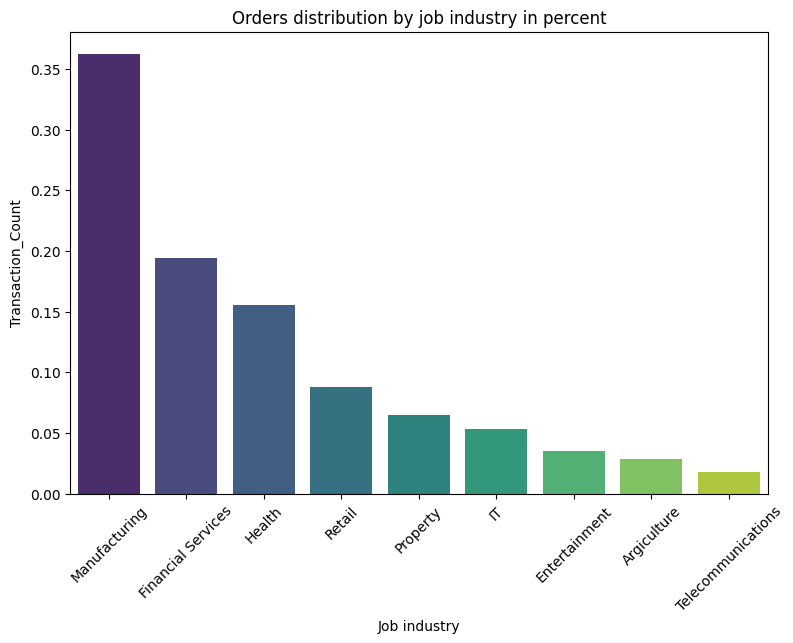

In [ ]:
#Orders distribution by job industry
plt.figure(figsize = (9,6))

counts = DTA['job_industry_category'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, palette='viridis')
plt.xlabel('Job industry')
plt.ylabel('Transaction_Count')
print(counts * 100)
plt.xticks(rotation=45)
plt.title("Orders distribution by job industry in percent")
plt.show()

**Graph Conclusion:** Most of the customers are employees of Manufacturing industry

NSW    53.421332
VIC    25.226319
QLD    21.352349
Name: state, dtype: float64


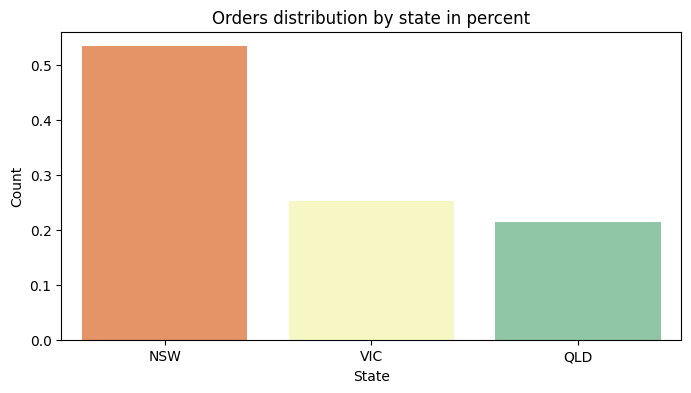

In [ ]:
# Orders distribution by state
plt.figure(figsize = (8,4), dpi = 100)
counts = DTA['state'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, palette='Spectral')
plt.xlabel('State')
plt.ylabel('Count')
print(counts * 100)

plt.title("Orders distribution by state in percent")
plt.show()

**Graph Conclusion:** Customers belonging to state NSW had the maximum number of orders, accounting for 50.59% of total orders.

Female     50.108734
Male       47.635665
Unknown     2.255601
Name: gender, dtype: float64


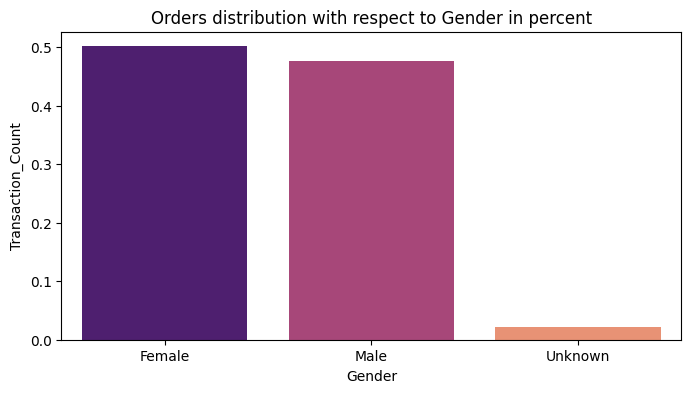

In [ ]:
# Orders distribution by gender
plt.figure(figsize = (8,4))
counts = DTA['gender'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, palette='magma')
plt.xlabel('Gender')
plt.ylabel('Transaction_Count')
print(counts * 100)

plt.title("Orders distribution with respect to Gender in percent")
plt.show()

**Graph Conclusion:**The % of orders made by Female and Male are almost same, females made 2% more orders than males.

In [ ]:
#Removing outliers for Age column and Standard Cost column

DTA = DTA[DTA["Age"] <= 80]
DTA=DTA[DTA['standard_cost']<=1750]

**Bivariate Analysis:**The analysis to understand the relation and dependency between two variables.

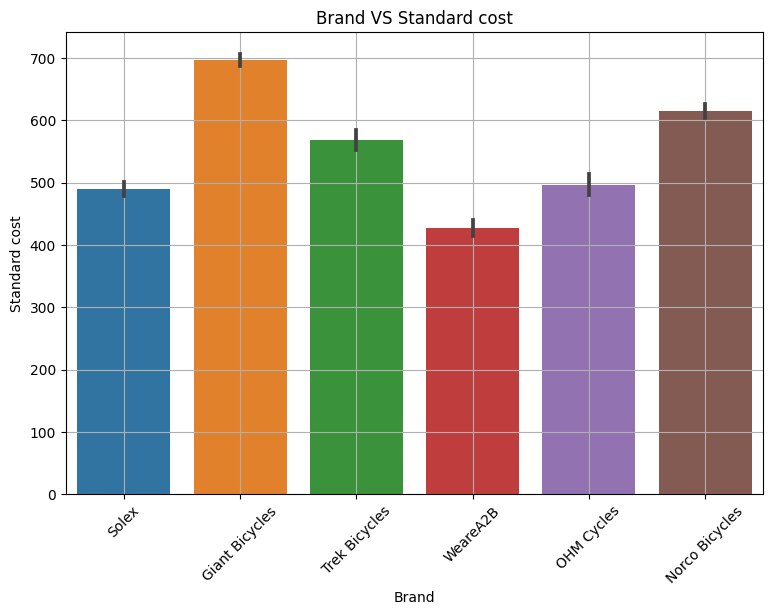

In [ ]:
# Brand VS cost

plt.figure(figsize = (9,6))

sns.barplot(data = DTA, x = "brand",y='standard_cost')
plt.xlabel('Brand');
plt.ylabel('Standard cost')
plt.xticks(rotation=45)
plt.title("Brand VS Standard cost")
plt.grid()
plt.show()


**Graph Conclusion:**The Giant Bicycles brand is the most expensive followed by Narco Bicycles.

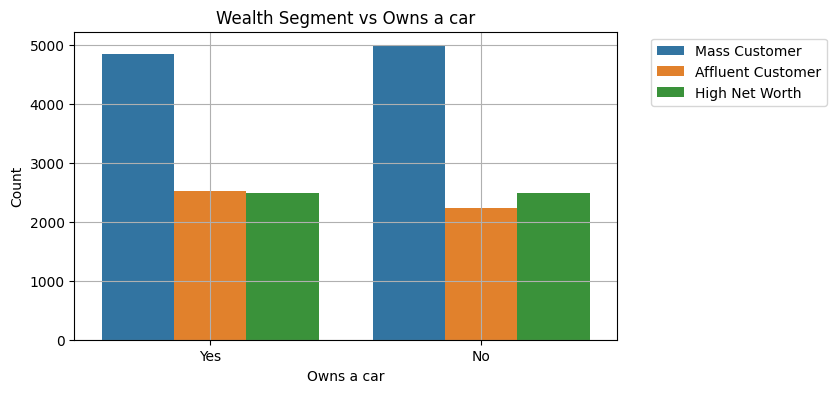

In [ ]:
# Wealth Segment vs owns a car

plt.figure(figsize = (7,4))

sns.countplot(data = DTA, x = "owns_car",hue='wealth_segment')
plt.xlabel('Owns a car');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Wealth Segment vs Owns a car")
plt.grid()
plt.show()

**Graph Conclusion**: Customers belonging to Mass Customers wealth segment owns considerably more number of cars than the customers belonging to the other two wealth segments.

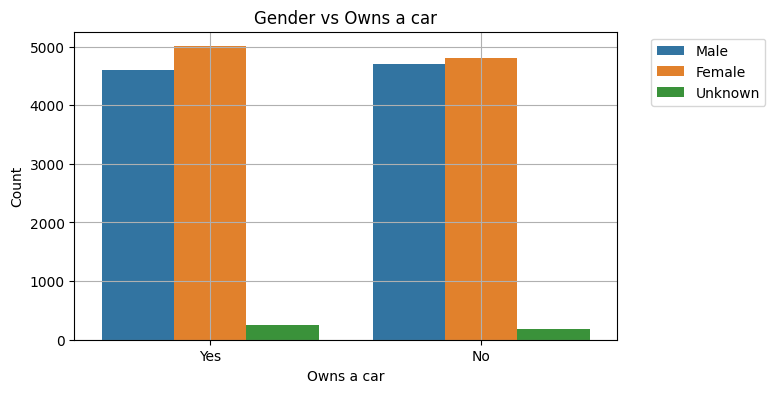

In [ ]:
# Gender vs owns a car

plt.figure(figsize = (7,4))

sns.countplot(data = DTA, x = "owns_car",hue='gender')
plt.xlabel('Owns a car');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Gender vs Owns a car")
plt.grid()
plt.show()

**Graph Conclusion** : Women who owns a car, buy more than women who don't own a car, whereas males who own a car, purchase less than males who don't.

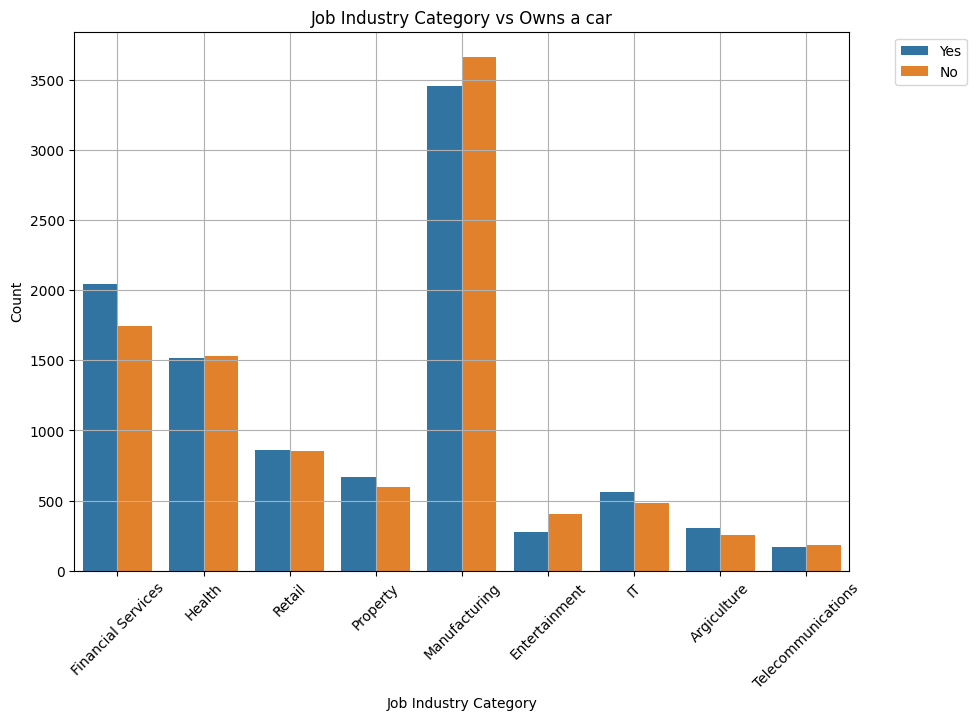

In [ ]:
# Job industry category vs owns a car

plt.figure(figsize = (10,7))

sns.countplot(data = DTA, x = "job_industry_category",hue='owns_car')
plt.xlabel('Job Industry Category');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Job Industry Category vs Owns a car")
plt.xticks(rotation=45)
plt.grid()
plt.show()

**Graph Conclusion:**Customers working in manufacturing industry contribute to maximum purchases from company. Further, manufacturing industry customers, who owns a car buy lesser number of items than the manufacturing industry customers who don't own a car.

In most of the industries, customers who own a car buy more than customers who don't own cars.

Exceptions are observed among health, manufacturing, entertainment, and Telecommunication industry customers.

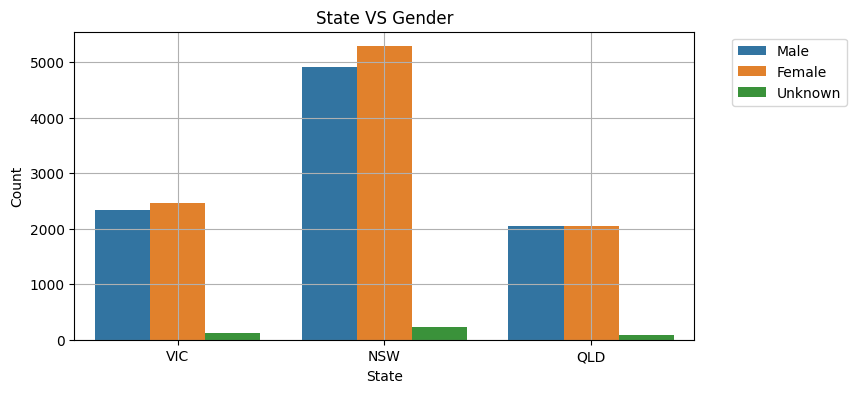

In [ ]:
#State vs Gender

plt.figure(figsize = (8,4))

sns.countplot(data = DTA, x = "state",hue='gender')
plt.xlabel('State');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("State VS Gender")
plt.grid()
plt.show()


**Graph Conclusion:** Customers belonging to the NSW state purchase the most than the customers belonging to any other states.

In most of the states, females make more purchases than males, exceptions are observed in Victoria and New South Wales States.

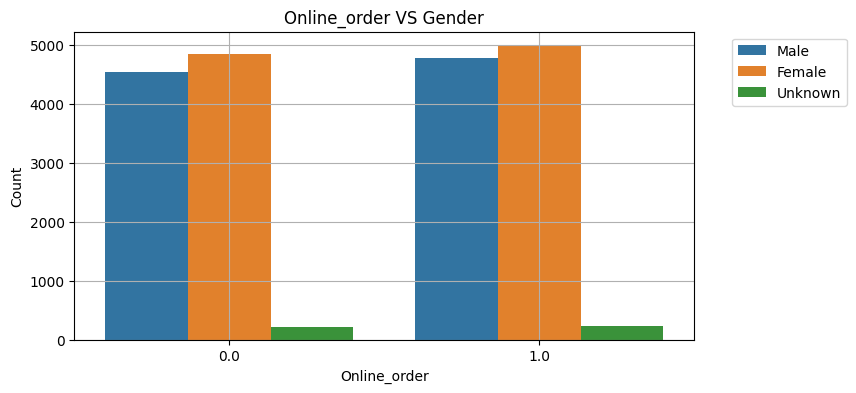

In [ ]:
#online_order vs Gender

plt.figure(figsize = (8,4))

sns.countplot(data = DTA, x = "online_order",hue='gender')
plt.xlabel('Online_order');
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Online_order VS Gender")
plt.grid()
plt.show()

**Graph Conclusion:**Women make more online purchases than men.

**MULTIVARIATE ANALYSIS**

In [ ]:
wealth_segment_revenue=DTA.groupby(['wealth_segment','gender'],as_index=False)['list_price'].sum()
wealth_segment_revenue

,wealth_segment,gender,list_price
0,Affluent Customer,Female,2565496.49
1,Affluent Customer,Male,2577954.24
2,Affluent Customer,Unknown,91512.79
3,High Net Worth,Female,2694103.96
4,High Net Worth,Male,2637203.20
5,High Net Worth,Unknown,123543.03
6,Mass Customer,Female,5470841.36
7,Mass Customer,Male,5048084.28
8,Mass Customer,Unknown,286013.11


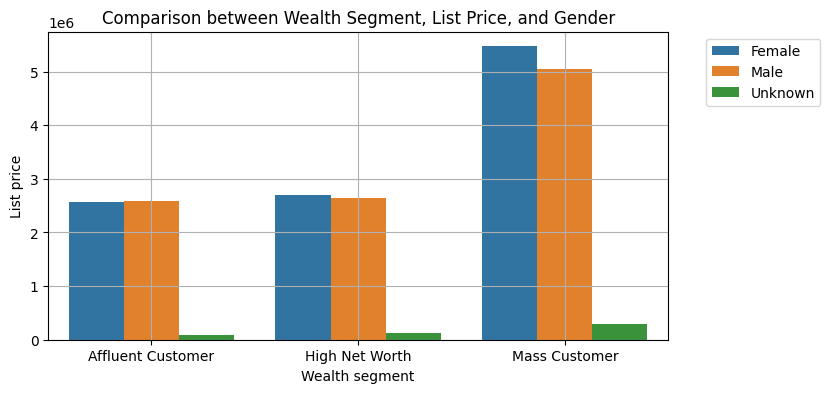

In [ ]:
plt.figure(figsize = (8,4));

sns.barplot(data=wealth_segment_revenue,x='wealth_segment',y='list_price',hue='gender');
plt.xlabel('Wealth segment');
plt.ylabel('List price');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.grid()
plt.title("Comparison between Wealth Segment, List Price, and Gender")
plt.show()

**Graph Conclusion:** Customers belonging to Mass Customers contribute to the largest share of revenue generated by the company.

In [ ]:
job_industry_revenue=DTA.groupby(['job_industry_category','gender'],as_index=False)['list_price'].sum()
job_industry_revenue

,job_industry_category,gender,list_price
0,Argiculture,Female,333753.58
1,Argiculture,Male,260924.62
2,Entertainment,Female,350103.01
3,Entertainment,Male,407437.64
4,Financial Services,Female,2065502.29
5,Financial Services,Male,2075485.49
6,Financial Services,Unknown,40199.77
7,Health,Female,1637568.44
8,Health,Male,1663749.82
9,Health,Unknown,31335.12


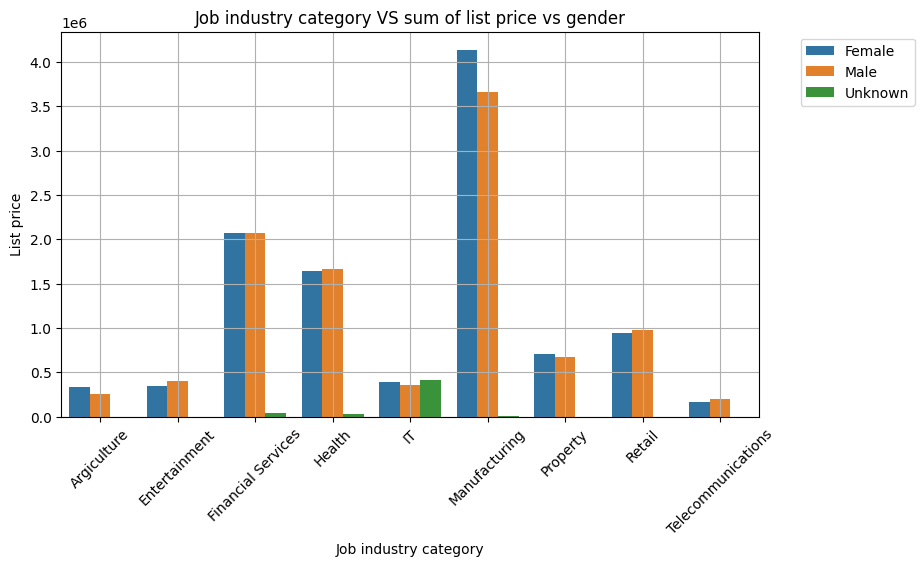

In [ ]:
#job_industry_category vs list price vs gender
plt.figure(figsize = (9,5));

sns.barplot(data=job_industry_revenue,x='job_industry_category',y='list_price',hue='gender');
plt.xlabel('Job industry category');
plt.ylabel('List price');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.title("Job industry category VS sum of list price vs gender");
plt.xticks(rotation=45);
plt.grid()
plt.show()


**Graph conclusion:**Customers working in Manufacturing industry contribute to the maximum revenue generated by the company.

<ipython-input-81-377f647f3b5d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(DTA.corr(), cmap = "icefire", annot = True);


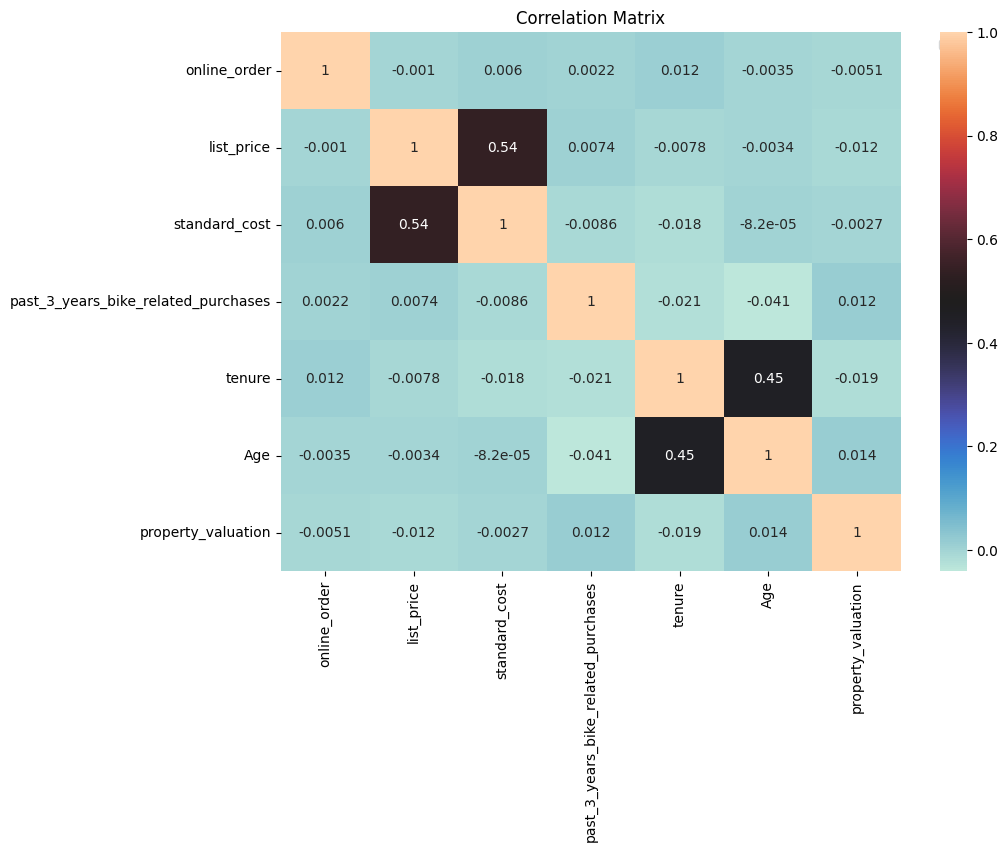

In [ ]:
# Correlation Matrix
plt.figure(figsize = (10,7));

sns.heatmap(DTA.corr(), cmap = "icefire", annot = True);
plt.title("Correlation Matrix");
plt.xticks(rotation = 90);
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

plt.show();

**Graph Conclusion:**No two numerical variables are highly correlated with each other.

**RFM Analysis and Segmentation**

In [ ]:
# Calculation Of Recency , frequency , monetary for each customer
end_date = max(DTA['transaction_date']) + dt.timedelta(days=1)

DTA_rfm = DTA.groupby('customer_id').agg(
    recency=('transaction_date', lambda x: (end_date - x.max()).days),
    frequency=('transaction_id', 'count'),
    monetary=('list_price', 'sum')
).reset_index()

DTA_rfm.head()

,customer_id,recency,frequency,monetary
0,1,8,11,9084.45
1,100,12,2,2748.20
2,1000,1,9,10183.70
3,1001,43,7,6233.51
4,1002,156,4,5038.32


In [ ]:
# Numerical description of the RFM dataframe
DTA_rfm.describe()

,recency,frequency,monetary
count,3483.000000,3483.000000,3483.000000
mean,62.660063,5.614126,6171.332891
std,58.582935,2.289839,2889.423320
min,1.000000,1.000000,60.340000
25%,18.500000,4.000000,4077.285000
50%,45.000000,5.000000,5897.310000
75%,87.000000,7.000000,7992.090000
max,360.000000,14.000000,19071.320000


In [ ]:
# Splitting the customers into 25, 50, and 75 percent quantiles
quant=DTA_rfm.quantile(q=[0.25,0.5,0.75])

<ipython-input-84-ed862237797d>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quant=DTA_rfm.quantile(q=[0.25,0.5,0.75])


In [ ]:
# Displaying segments of Recency, Frequency, Monetary separately
quant.to_dict()

{'recency': {0.25: 18.5, 0.5: 45.0, 0.75: 87.0},
 'frequency': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0},
 'monetary': {0.25: 4077.285, 0.5: 5897.3099999999995, 0.75: 7992.09}}

In [ ]:
# We will segment data into four groups using quantiles 

## for Recency 

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
## for Frequency and Monetary value 

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1  

In [ ]:
# Applying the function to each rfm column to create segment for each customer in each r,f,m column
DTA_rfm['R'] = DTA_rfm['recency'].apply(RClass, args=('recency',quant))
DTA_rfm['F'] = DTA_rfm['frequency'].apply(FMClass, args=('frequency',quant))
DTA_rfm['M'] = DTA_rfm['monetary'].apply(FMClass, args=('monetary',quant))

In [ ]:
# Calculation of overall RFM scores based on indivial R, F, and M scores
DTA_rfm['RFMClass'] = DTA_rfm['R'].map(str) + DTA_rfm['F'].map(str) + DTA_rfm['M'].map(str)
DTA_rfm['RFMscore']= DTA_rfm[['R','F','M']].sum(axis=1)

In [ ]:
DTA_rfm.head()

,customer_id,recency,frequency,monetary,R,F,M,RFMClass,RFMscore
0,1,8,11,9084.45,1,1,1,111,3
1,100,12,2,2748.20,1,4,4,144,9
2,1000,1,9,10183.70,1,1,1,111,3
3,1001,43,7,6233.51,2,2,2,222,6
4,1002,156,4,5038.32,4,4,3,443,11


In [ ]:
# Assigning Loyality level to each customer 
Loyality_level=['Platinum','Gold','Silver','Bronze']
score_cuts=pd.qcut(DTA_rfm['RFMscore'],q=4,labels=Loyality_level)
DTA_rfm['RFM_loyalty_level']=score_cuts.values
DTA_rfm.head()

,customer_id,recency,frequency,monetary,R,F,M,RFMClass,RFMscore,RFM_loyalty_level
0,1,8,11,9084.45,1,1,1,111,3,Platinum
1,100,12,2,2748.20,1,4,4,144,9,Silver
2,1000,1,9,10183.70,1,1,1,111,3,Platinum
3,1001,43,7,6233.51,2,2,2,222,6,Gold
4,1002,156,4,5038.32,4,4,3,443,11,Bronze


<Figure size 800x400 with 0 Axes>

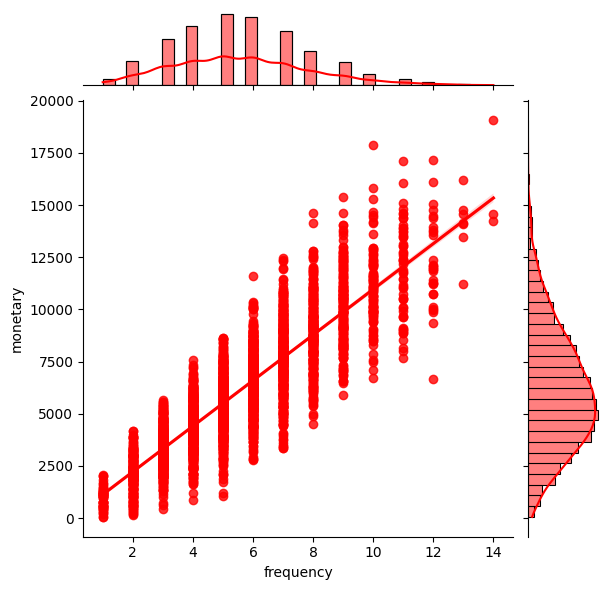

In [ ]:
plt.figure(figsize=(8,4),dpi=100);
sns.jointplot(x='frequency',y='monetary',data=DTA_rfm,kind='reg', color="r");

<Figure size 800x400 with 0 Axes>

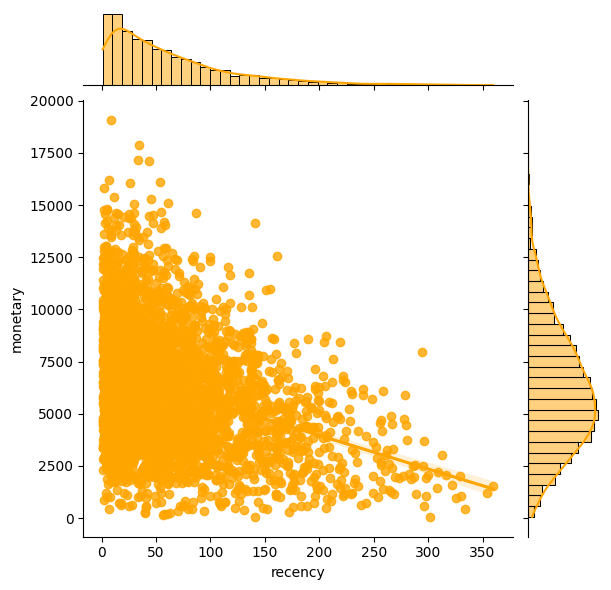

In [ ]:
plt.figure(figsize=(8,4),dpi=100);
sns.jointplot(x='recency',y='monetary',data=DTA_rfm,kind='reg', color="orange");

In [ ]:
# Joining the RFM Dataset with the main dataset
DTA_rfm_merged=DTA.merge(DTA_rfm,on='customer_id',how='inner')

In [ ]:
DTA_rfm_merged.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Age_group,recency,frequency,monetary,R,F,M,RFMClass,RFMscore,RFM_loyalty_level
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,51-70,76,3,1953.15,3,4,4,344,11,Bronze
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,51-70,76,3,1953.15,3,4,4,344,11,Bronze
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,51-70,76,3,1953.15,3,4,4,344,11,Bronze
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,31-50,21,7,7351.70,2,2,2,222,6,Gold
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,31-50,21,7,7351.70,2,2,2,222,6,Gold


In [ ]:
# Convering merged RFM dataframe to CSV file
DTA_rfm_merged.to_csv('/content/drive/MyDrive/Major_Project/DTA_rfm_merged.csv')

**Module 3 : RFM Modeling and Model Evaluation**

In [ ]:
DTA_rfm=pd.read_csv('/content/drive/MyDrive/Major_Project/DTA_rfm_merged.csv')
DTA_rfm.head()

,Unnamed: 0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,...,Age_group,recency,frequency,monetary,R,F,M,RFMClass,RFMscore,RFM_loyalty_level
0,0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,...,51-70,76,3,1953.15,3,4,4,344,11,Bronze
1,1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,...,51-70,76,3,1953.15,3,4,4,344,11,Bronze
2,2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,...,51-70,76,3,1953.15,3,4,4,344,11,Bronze
3,3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,...,31-50,21,7,7351.70,2,2,2,222,6,Gold
4,4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,...,31-50,21,7,7351.70,2,2,2,222,6,Gold


In [ ]:
# Dropping the Unnamed Column
DTA_rfm.drop('Unnamed: 0',axis=1,inplace=True)
DTA_rfm.head()

# Unnamed column is thus dropped

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Age_group,recency,frequency,monetary,R,F,M,RFMClass,RFMscore,RFM_loyalty_level
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,51-70,76,3,1953.15,3,4,4,344,11,Bronze
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,51-70,76,3,1953.15,3,4,4,344,11,Bronze
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,51-70,76,3,1953.15,3,4,4,344,11,Bronze
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,31-50,21,7,7351.70,2,2,2,222,6,Gold
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,31-50,21,7,7351.70,2,2,2,222,6,Gold


In [ ]:
# Creating a separate training dataset with only training features
train_data=DTA_rfm[['gender','past_3_years_bike_related_purchases','job_industry_category','wealth_segment','owns_car','tenure','Age','property_valuation','RFM_loyalty_level']]
train_data.head()

,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,Age,property_valuation,RFM_loyalty_level
0,Male,19,Financial Services,Mass Customer,Yes,10.0,68,6,Bronze
1,Male,19,Financial Services,Mass Customer,Yes,10.0,68,6,Bronze
2,Male,19,Financial Services,Mass Customer,Yes,10.0,68,6,Bronze
3,Female,89,Health,Mass Customer,Yes,10.0,44,5,Gold
4,Female,89,Health,Mass Customer,Yes,10.0,44,5,Gold


In [ ]:
# Checking the shape of the training dataframe
train_data.shape

(19554, 9)

***Encoding of categorical variables***

In [ ]:
from sklearn.preprocessing import LabelEncoder
train_data['gender'] = LabelEncoder().fit_transform(train_data['gender'])
train_data['gender'].unique()


<ipython-input-100-e5495b73eefc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['gender'] = LabelEncoder().fit_transform(train_data['gender'])


array([1, 0, 2])

In [ ]:
job_industry_category=train_data[['job_industry_category']]
job_industry_category=pd.get_dummies(job_industry_category,drop_first=True)
job_industry_category.head()

,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [ ]:
# One hot encoding of owns_car
train_data['owns_car'] = pd.get_dummies(train_data['owns_car'], drop_first=True)
train_data['owns_car'].unique()

<ipython-input-102-df701c50103b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['owns_car'] = pd.get_dummies(train_data['owns_car'], drop_first=True)


array([1, 0], dtype=uint8)

In [ ]:
from sklearn.preprocessing import LabelEncoder
train_data['wealth_segment'] = LabelEncoder().fit_transform(train_data['wealth_segment'])
train_data['wealth_segment'].unique()

<ipython-input-103-a742b2ec4d54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['wealth_segment'] = LabelEncoder().fit_transform(train_data['wealth_segment'])


array([2, 0, 1])

Creation of a separate dataframe with only the transformed variables

In [ ]:
train_data1 = train_data[['past_3_years_bike_related_purchases','tenure','Age','property_valuation','wealth_segment']]

In [ ]:
train_data2 = train_data[['gender', 'job_industry_category', 'owns_car']]

In [ ]:
#Concatenating transformed categorical columns with the old_customers dataframe
final_train_data = pd.concat([train_data1, train_data2], axis=1)
final_train_data.head()

,past_3_years_bike_related_purchases,tenure,Age,property_valuation,wealth_segment,gender,job_industry_category,owns_car
0,19,10.0,68,6,2,1,Financial Services,1
1,19,10.0,68,6,2,1,Financial Services,1
2,19,10.0,68,6,2,1,Financial Services,1
3,89,10.0,44,5,2,0,Health,1
4,89,10.0,44,5,2,0,Health,1


In [ ]:
final_train_data['job_industry_category'] = LabelEncoder().fit_transform(final_train_data['job_industry_category'])
final_train_data['job_industry_category'].unique()

array([2, 3, 7, 6, 5, 1, 4, 0, 8])

In [ ]:
final_train_data.head()

,past_3_years_bike_related_purchases,tenure,Age,property_valuation,wealth_segment,gender,job_industry_category,owns_car
0,19,10.0,68,6,2,1,2,1
1,19,10.0,68,6,2,1,2,1
2,19,10.0,68,6,2,1,2,1
3,89,10.0,44,5,2,0,3,1
4,89,10.0,44,5,2,0,3,1


In [ ]:
final_train_data.shape

(19554, 8)

**New Customers Dataset**

In [ ]:
new_customers = pd.read_excel('/content/drive/MyDrive/Major_Project/customer_segmentation_raw.xlsx', sheet_name = 'NewCustomerList')
new_customers.head()

<ipython-input-110-fbf635e56b03>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_customers = pd.read_excel('/content/drive/MyDrive/Major_Project/customer_segmentation_raw.xlsx', sheet_name = 'NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.97,1.2125,1.515625,1.288281,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.53,0.5300,0.662500,0.563125,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.75,0.7500,0.750000,0.750000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.95,1.1875,1.187500,1.187500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.40,0.4000,0.500000,0.500000,4,4,1.703125


In [ ]:
# Dropping the Unnamed Column

new_customers.drop('Unnamed: 17', axis=1, inplace=True)
new_customers.drop('Unnamed: 18', axis=1, inplace=True)
new_customers.drop('Unnamed: 19', axis=1, inplace=True)
new_customers.drop('Unnamed: 20', axis=1, inplace=True)
new_customers.head()

# Unnamed column is thus dropped

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.97,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.53,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.75,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.95,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.40,4,1.703125


In [ ]:
new_customers.drop('Unnamed: 16', axis=1, inplace=True)

In [ ]:
new_customers.head(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875


In [ ]:
new_customers_copy=new_customers.copy()

In [ ]:
new_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [ ]:
# How many missing points in each variable
count_missing_new_customers = new_customers.isnull().sum()
percent_missing_new_customers = round(new_customers.isnull().sum()/len(new_customers) * 100, 1)
missing_new_customers = pd.concat([count_missing_new_customers, percent_missing_new_customers], axis = 1)
missing_new_customers.columns = ["Missing (count)", "Missing (%)"]
missing_new_customers

,Missing (count),Missing (%)
first_name,0,0.0
last_name,29,2.9
gender,0,0.0
past_3_years_bike_related_purchases,0,0.0
DOB,17,1.7
job_title,106,10.6
job_industry_category,165,16.5
wealth_segment,0,0.0
deceased_indicator,0,0.0
owns_car,0,0.0


In [ ]:
# we will fill in the job_title,job_industry_category column with the mode value which is the most repeated value in the column
new_customers['job_title'] = new_customers['job_title'].fillna(new_customers['job_title'].mode()[0])
new_customers['job_industry_category'] = new_customers['job_industry_category'].fillna(new_customers['job_industry_category'].mode()[0])

In [ ]:
# removing null values from dataset
new_customers['DOB'].dropna(inplace=True,axis=0)

In [ ]:
# removing null values from dataset
new_customers['last_name'].dropna(inplace=True,axis=0)

In [ ]:
# changing U to Unknown in Gender
new_customers['gender'] = np.where(new_customers['gender']=='U', 'Unknown', new_customers['gender'])
new_customers['gender'].value_counts()

Female     513
Male       470
Unknown     17
Name: gender, dtype: int64

In [ ]:
#changing Date of birth column into date column to extract Age from it
new_customers['DOB']=pd.to_datetime(new_customers['DOB'])

In [ ]:
# This function converts given date to age
def from_dob_to_age(born):
    today = dt.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [ ]:
#creating a new Age column in the dataset
new_customers['Age']=new_customers['DOB'].apply(lambda x: from_dob_to_age(x))

In [ ]:
new_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,65.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,53.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,48.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,44.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,57.0


In [ ]:
# checking for duplicates in the dataset
new_customers.duplicated().sum()

0

In [ ]:
# Collecting the categorical columns into  list
cat_col=[]
for x in new_customers.dtypes.index:
    if new_customers.dtypes[x]=='object':
        cat_col.append(x)
cat_col

['first_name',
 'last_name',
 'gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'address',
 'state',
 'country']

***Encoding of categorical variavles***

In [ ]:
# One hot encoding of gender variable into binary values
# changing categorical data columns into binary using one hot coding

gender_new=new_customers[['gender']]
gender_new=pd.get_dummies(gender_new)
gender_new.head()

,gender_Female,gender_Male,gender_Unknown
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
# changing job_industry_category_new categorical column into binary using one hot coding
job_industry_category_new=new_customers[['job_industry_category']]
job_industry_category_new=pd.get_dummies(job_industry_category_new,drop_first=True)
job_industry_category_new.head()

,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,job_industry_category_Retail,job_industry_category_Telecommunications
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0


In [ ]:
# changing owns_car_new categorical column into binary using one hot coding
owns_car_new=new_customers[['owns_car']]
owns_car_new=pd.get_dummies(owns_car_new,drop_first=True)
owns_car_new.head()

,owns_car_Yes
0,1
1,0
2,0
3,1
4,0


In [ ]:
#Transforming using label_encoder
from sklearn.preprocessing import LabelEncoder
new_customers['wealth_segment']=LabelEncoder().fit_transform(new_customers['wealth_segment'])

In [ ]:
#creating a new dataframe with numerical values only
new_customers1=new_customers[['past_3_years_bike_related_purchases','tenure','Age','property_valuation','wealth_segment']]

In [ ]:
#Concatenating transformed categorical columns with the new_customer numerical dataframe
new_customers1=pd.concat([gender_new,job_industry_category_new,owns_car_new,new_customers1],axis=1)

In [ ]:
train_data1.shape

(19554, 5)

In [ ]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19554 entries, 0 to 19553
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   past_3_years_bike_related_purchases  19554 non-null  int64  
 1   tenure                               19554 non-null  float64
 2   Age                                  19554 non-null  int64  
 3   property_valuation                   19554 non-null  int64  
 4   wealth_segment                       19554 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 764.0 KB


In [ ]:
new_customers1.shape

(1000, 17)

In [ ]:
new_customers1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   gender_Female                             1000 non-null   uint8  
 1   gender_Male                               1000 non-null   uint8  
 2   gender_Unknown                            1000 non-null   uint8  
 3   job_industry_category_Entertainment       1000 non-null   uint8  
 4   job_industry_category_Financial Services  1000 non-null   uint8  
 5   job_industry_category_Health              1000 non-null   uint8  
 6   job_industry_category_IT                  1000 non-null   uint8  
 7   job_industry_category_Manufacturing       1000 non-null   uint8  
 8   job_industry_category_Property            1000 non-null   uint8  
 9   job_industry_category_Retail              1000 non-null   uint8  
 10  job_industry_category_Telecommunicati

**MODEL BUILDING**

We will be training our model on old customers dataset and predicting the working and efficiency of the model, based on new customers dataset

In [ ]:
# Splitting our old customers 1 dataset
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(train_data1, train_data['RFM_loyalty_level'],test_size= 0.25, random_state=10)

In [ ]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_features)

In [ ]:
# Create the classification report
from sklearn.metrics import classification_report
class_rep_tree = classification_report(test_labels, pred_labels_tree)

In [ ]:
#View the performance of the model
print("Decision Tree: \n", class_rep_tree)

Decision Tree: 
               precision    recall  f1-score   support

      Bronze       0.98      0.95      0.96       496
        Gold       0.99      1.00      0.99      1728
    Platinum       0.99      1.00      1.00      1898
      Silver       0.98      0.96      0.97       767

    accuracy                           0.99      4889
   macro avg       0.98      0.98      0.98      4889
weighted avg       0.99      0.99      0.99      4889



In [ ]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rs = RandomForestClassifier()
rs.fit(train_features, train_labels)

# Predict the labels for the test data
pred_labels_rs = rs.predict(test_features)

In [ ]:
# Create the classification report
class_rep_rs = classification_report(test_labels, pred_labels_rs)

In [ ]:
#View the performance of the model
print("RandomForestClassifier: \n", class_rep_rs)

RandomForestClassifier: 
               precision    recall  f1-score   support

      Bronze       0.98      0.95      0.96       496
        Gold       0.98      1.00      0.99      1728
    Platinum       0.99      1.00      0.99      1898
      Silver       0.99      0.96      0.98       767

    accuracy                           0.99      4889
   macro avg       0.99      0.98      0.98      4889
weighted avg       0.99      0.99      0.99      4889



## MODEL 2 : Prediction of target customers based on the probability values of profits made on them##

In [ ]:
transactions=pd.read_excel('/content/drive/MyDrive/Major_Project/customer_segmentation_raw.xlsx', sheet_name='Transactions')
transactions.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0


In [ ]:
demographic=pd.read_excel('/content/drive/MyDrive/Major_Project/customer_segmentation_raw.xlsx', sheet_name='CustomerDemographic')
demographic.head(2)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
<ipython-input-145-c668eec8330f>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demographic=pd.read_excel('/content/drive/MyDrive/Major_Project/customer_segmentation_raw.xlsx', sheet_name='CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


In [ ]:
address=pd.read_excel('/content/drive/MyDrive/Major_Project/customer_segmentation_raw.xlsx', sheet_name='CustomerAddress')
address.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


**Data issue 2: missing values and duplicate rows (the most common data issue) **

In [ ]:
# define a function to display missing values and dupliate rows
def general_infomation(dataset, dataset_name):  
    print('There are', dataset.shape[0], 'rows and', dataset.shape[1], 'columns in the dataset', '"'+dataset_name+'"','\n'+'--'*40)
    # display missing values
    if dataset.isna().sum().sum()!=0:  # if there is missing values
        missing_value = dataset.isna().sum()[dataset.isna().sum()!=0].to_frame(name='count')
        missing_value['proportion'] = missing_value['count']/len(dataset)
        print('There are', dataset.isna().sum().sum(), 'missing values')
        print(missing_value, '\n'+'--'*40)
    else:
        print('There is no missing value')
    # display duplicate rows
    if dataset.duplicated().sum()!=0:
        print('There are', dataset.duplicated().sum(), 'duplicate rows\n')
    else:
        print('There is no duplicate row\n')

In [ ]:
general_infomation(dataset=transactions, dataset_name='Transactions')
general_infomation(dataset=demographic, dataset_name='CustomerDemographic')
general_infomation(dataset=address, dataset_name='CustomerAddress')

There are 20000 rows and 13 columns in the dataset "Transactions" 
--------------------------------------------------------------------------------
There are 1542 missing values
                         count  proportion
online_order               360     0.01800
brand                      197     0.00985
product_line               197     0.00985
product_class              197     0.00985
product_size               197     0.00985
standard_cost              197     0.00985
product_first_sold_date    197     0.00985 
--------------------------------------------------------------------------------
There is no duplicate row

There are 4000 rows and 13 columns in the dataset "CustomerDemographic" 
--------------------------------------------------------------------------------
There are 1763 missing values
                       count  proportion
last_name                125     0.03125
DOB                       87     0.02175
job_title                506     0.12650
job_industry_category

First, process missing values in dataset "Transactions". We can see missing values in the column "brand", "product_line", "product_class", "product_size", "standard_cost" and "product_first_sold_date" are in the same rows. And the proportion of such rows is rather small (less than 1%), so just remove those rows.

In [ ]:
# 197 rows of record
transactions[transactions['brand'].isna()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaN


In [ ]:
# remove these 197 rows
transactions = transactions[transactions['brand'].notna()]
# there are still 358 missing values in column "online_order", the proportion of these rows is still rather small (less than 2%), so also remove them. 
general_infomation(dataset=transactions, dataset_name='Transactions')

There are 19803 rows and 13 columns in the dataset "Transactions" 
--------------------------------------------------------------------------------
There are 358 missing values
              count  proportion
online_order    358    0.018078 
--------------------------------------------------------------------------------
There is no duplicate row



In [ ]:
# remove these 358 rows, then reset the index
transactions = transactions[transactions['online_order'].notna()].reset_index(drop=True)
# no missing values
general_infomation(dataset=transactions, dataset_name='Transactions')

There are 19445 rows and 13 columns in the dataset "Transactions" 
--------------------------------------------------------------------------------
There is no missing value
There is no duplicate row



Then process missing values in the dataset "CustomerDemographic", as this is the key dataset and the number of rows including missing values is not negligible, so a proper imputation strategy is **replacing missing values with specific values, instead of removing any row.**

For categorical features, missing values can be replaced with the most common value or a specific value, like "unknown".

For numeric features, normally replace missing values with the median value or the mean value.

In [ ]:
# process missing values
demographic['last_name'] = demographic['last_name'].fillna('Unknown')   # replace with "Unknown"
demographic['DOB'] = demographic['DOB'].fillna(demographic['DOB'].median())   # replace with the median value
demographic['job_title'] = demographic['job_title'].fillna('Unknown')   # replace with "Unknown"
demographic['job_industry_category'] = demographic['job_industry_category'].fillna('Unknown')   # replace with "Unknown"
demographic['tenure'] = demographic['tenure'].fillna(demographic['tenure'].median())   # replace with the median value

In [ ]:
# check again, all missing values have been processed
general_infomation(dataset=demographic, dataset_name='CustomerDemographic')

There are 4000 rows and 13 columns in the dataset "CustomerDemographic" 
--------------------------------------------------------------------------------
There are 302 missing values
         count  proportion
default    302      0.0755 
--------------------------------------------------------------------------------
There is no duplicate row



**Data issue 3: consistency (for a categorical feature, a category must be uniquely identified by a single value)**

In [ ]:
# define a function to show general information on a categorical feature. dataset: a pandas dataframe
def describe_categorical(dataset):
    cat_columns = dataset.dtypes[dataset.dtypes=='object'].index.tolist()
    if len(cat_columns)!=0:
        print('Categorical variables are', cat_columns,'\n'+'=='*40)
        for cat in cat_columns:
            describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
            describe_frame['proportion'] = describe_frame['count']/len(dataset)
            print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
    else:
        print('There is no categorical variables in the dataset')

There seems to be no issue in the transactions dataset

In [ ]:
# check consistancy of dataset "Transactions", no issue is found
describe_categorical(dataset=transactions)

Categorical variables are ['order_status', 'brand', 'product_line', 'product_class', 'product_size'] 
  order_status  count  proportion
0     Approved  19273    0.991155
1    Cancelled    172    0.008845 
--------------------------------------------------------------------------------
            brand  count  proportion
0           Solex   4169    0.214400
1        WeareA2B   3245    0.166881
2  Giant Bicycles   3244    0.166830
3      OHM Cycles   2993    0.153921
4   Trek Bicycles   2931    0.150733
5  Norco Bicycles   2863    0.147236 
--------------------------------------------------------------------------------
  product_line  count  proportion
0     Standard  13920    0.715865
1         Road   3894    0.200257
2      Touring   1213    0.062381
3     Mountain    418    0.021497 
--------------------------------------------------------------------------------
  product_class  count  proportion
0        medium  13587    0.698740
1          high   2952    0.151813
2           low 

In [ ]:
# check consistancy of dataset "CustomerDemographic"
#describe_categorical(dataset=demographic)
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  4000 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
# convert "F" and "Femal" to "Female", convert "M" to "Male", convert "U" to "Unknown"
demographic.loc[demographic['gender'].isin(['F','Femal']), 'gender'] = 'Female'
demographic.loc[demographic['gender']=='M', 'gender'] = 'Male'
demographic.loc[demographic['gender']=='U', 'gender'] = 'Unknown'
# check again, problem solved
demographic['gender'].value_counts()

In [ ]:
describe_categorical(dataset=address)

In [ ]:
# Use "NSW" and "VIC" to represent the state of New South Wales and the state of Victoria respectively.
import numpy as np

address['state'] = np.where(address['state']=='New South Wales', 'NSW', address['state'])  # convert "New South Wales" to "NSW"
address['state'] = np.where(address['state']=='Victoria', 'VIC', address['state'])   # convert "Victoria" to "VIC"
# check again, problem solved
address['state'].value_counts()

**Data issue 4: outliers. For a numeric or datetime feature, if a data point is quite far away from other data points, then this point can be seen as an outlier.**

**Note: outliers are not definitely incorrect values, they are just very different from other values.**

In [ ]:
# defien a function to show general information about a numeric feature. dataset: a pandas dataframe;
def describe_numeric(dataset):
    # for numeric columns whose values are discrete, display values and their frequency
    int_columns = dataset.dtypes[dataset.dtypes=='int'].index.tolist()
    # for numeric columns whose values are continuous, plot their value distribution
    float_columns = dataset.dtypes[dataset.dtypes=='float'].index.tolist()
    if len(int_columns)+len(float_columns)!=0:
        print('Numeric variables are', int_columns+float_columns,'\n'+'=='*40)
        # integer feature
        if len(int_columns)!=0:    
            for cat in int_columns:
                describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count']/len(dataset)
                print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
        # float feature
        if len(float_columns)!=0:   
            print(dataset[float_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}), '\n'+'--'*40)
            for cat in float_columns:
                sns.histplot(dataset[cat])
                plt.show()
    else:
        print('There is no numeric variables in the dataset')

In [ ]:
# check outlier of dataset "Transactions"
describe_numeric(dataset=transactions)

It seems that there is  outlier in the standard cost feature of the dataset "Transactions".

In [ ]:
# replace with the median value
median = transactions.loc[transactions['standard_cost']<1250, 'standard_cost'].median()
transactions.loc[transactions.standard_cost >= 1200, 'standard_cost'] = np.nan
transactions.fillna(median,inplace=True)

In [ ]:
describe_numeric(dataset=transactions)

Outlier in standard_cost is removed

In [ ]:
# check outlier of dataset "CustomerDemographic"
describe_numeric(dataset=demographic)

No outliers in demographic dataset

In [ ]:
# check outlier of dataset "CustomerAddress", it seems there is no issue.
describe_numeric(dataset=address)

No outliers in address numeric variables too

check outlier of dataset "CustomerAddress", it seems there is no issue.
describe_numeric(dataset=address)

In [ ]:
# dataset: a pandas dataframe;
def describe_datetime(dataset):
    datetime_columns = dataset.dtypes[dataset.dtypes=='datetime64[ns]'].index.tolist()
    if len(datetime_columns)!=0:
        print('Datetime variables are', datetime_columns,'\n'+'=='*40)
        for cat in datetime_columns:
            sns.histplot(dataset[cat])
            plt.show()
    else:
        print('There is no datatime variables in the dataset')

In [ ]:
# check outlier of dataset "Transactions"
describe_datetime(dataset=transactions)

Datetime feature in Transactions dataset is normal

Let's check the datetime feature in the dataset "CustomerDemographic". We can see a customer's value (born in 1843) was quite far from other customers. This is a outlier point and also an incorrect value, just replace it with the median value.



In [ ]:
# check outlier of dataset "CustomerDemographic".
describe_datetime(dataset=demographic)

In [ ]:
# take a close look at this point, from the chart, there is only one outlier point.
sns.histplot(demographic['DOB'], color='purple')
plt.ylim(0,2)

In [ ]:
# replace with the median value
#demographic.loc[demographic['DOB']==pd.Timestamp('1843-12-21 00:00:00'), 'DOB'] = demographic['DOB'].median()
# check again, problem solved
#describe_datetime(dataset=demographic)

**Data issue 5: completeness**
When merging multiple datasets, the completeness of key columns (similar to the primary key in database) is very important. If the key columns is not complete, new missing values will generated when merging. The datasets can be combined via the column "customer_id", so let's check its completeness.

Each dataset has different number of customers

**Data issue 5: completeness**
When merging multiple datasets, the completeness of key columns (similar to the primary key in database) is very important. If the key columns is not complete, new missing values will generated when merging. The datasets can be combined via the column "customer_id", so let's check its completeness.

In [ ]:
# transaction dataset has 3492 unique customer id
transactions_cus_id = transactions['customer_id'].unique()
print(f"There are {transactions_cus_id.shape[0]} customer ids in the dataset Transactions.")
# demographic dataset has 4000 unique customer id
demographic_cus_id = demographic['customer_id'].unique()
print(f"There are {demographic_cus_id.shape[0]} customer ids in the dataset CustomerDemographic.")
# address dataset has 3999 unique customer id
address_cus_id = address['customer_id'].unique()
print(f"There are {address_cus_id.shape[0]} customer ids in the dataset CustomerAddress.")

<font size="3"> The dataset "CustomerDemographic" has more unique customer id than the dataset "Transactions". This might be because the some customers did not make any purchase during the period.
    
<font size="3"> Besides, 509 customer ids only exist in the dataset "CustomerDemographic" and 1 customer id only exists in the dataset "Transactions".

In [ ]:
# there are only 3491 common customer ids in both the dataset "CustomerDemographic" and the dataset "Transactions"
inter_trans_demographic = np.intersect1d(transactions_cus_id, demographic_cus_id)
print(f'There are {inter_trans_demographic.shape[0]} customer ids in both the dataset "CustomerDemographic" and the dataset "Transactions"')
# there are 4001 unqiue customer ids in either the dataset "CustomerDemographic" or the dataset "Transactions"
union_trans_demographic = np.union1d(transactions_cus_id, demographic_cus_id)
print(f'There are {union_trans_demographic.shape[0]} customer ids in either the dataset "CustomerDemographic" or the dataset "Transactions"')
#
print(f'The dataset "CustomerDemographic" has {demographic_cus_id.shape[0]-inter_trans_demographic.shape[0]} exclusive customer ids')
print(f'The dataset "Transactions" has {transactions_cus_id.shape[0]-inter_trans_demographic.shape[0]} exclusive customer ids')

The same problem also happens to the dataset "CustomerDemographic" and "CustomerAddress". Each dataset has their exclusive customer ids.

4 customer ids only exist in the dataset "CustomerDemographic" and 3 customer id only exists in the dataset "Transactions".


In [ ]:
# there are 3941 common customer ids in both the dataset "CustomerDemographic" and the dataset "CustomerAddress"
inter_address_demographic = np.intersect1d(address_cus_id, demographic_cus_id)
print(f'There are {inter_address_demographic.shape[0]} customer ids in both the dataset "CustomerDemographic" and the dataset "CustomerAddress"')
# there are 4001 unqiue customer ids in either the dataset "CustomerDemographic" or the dataset "CustomerAddress"
union_address_demographic = np.union1d(address_cus_id, demographic_cus_id)
print(f'There are {union_address_demographic.shape[0]} customer ids in either the dataset "CustomerDemographic" or the dataset "CustomerAddress"')
# 
print(f'The dataset "CustomerDemographic" has {demographic_cus_id.shape[0]-inter_address_demographic.shape[0]} exclusive customer ids')
print(f'The dataset "CustomerAddress" has {address_cus_id.shape[0]-inter_address_demographic.shape[0]} exclusive customer ids')

**Predicting high profit customers**

<font size="3"> I assume that the current 4000 customers are not all high value customers, as some of them did not appear in the transaction dataset, which indicates these customers did not even make any purchase during the period. High value customers should be the ones who can bring much more profit than others. 
    
<font size="3"> So, I define two metrics to evaluate high value customers:
    
<font size="3"> **1. High purchase frequency**
    
<font size="3"> **2. High profit**
    
<font size="3"> In this case. high value customers must be found out with the help of the transcation dasetset first and label them. Then, this task will be turned into a classic binary classification problem. Train a binary classifier and make prediction.
    
<font size="3"> This task can be finished in the following steps:
    
<font size="3"> Step 1: Find out high value customers
    
<font size="3"> Step 2: Build a binary classifier and evaluate the model
    
<font size="3"> Step 3: Predict high value customers and demonstrate the results

<font size=3> **Step 1: Find out high value customers**  
<font size="3"> In order to find out the thresholds of purchase frequency and profit, we need to set an additional criterion: **high values customers must generate over 80% of the total profit altogether.**

<font size="3"> Calculate the purchase frequency. It is clear more customers made a purchase 5 times, so 4,5 and 6 might be the proper threshold values. 

In [ ]:
#
fig = plt.figure(figsize=(8,6))
purchase_frequency = transactions.groupby(['customer_id']).size().reset_index(name='purchase_frequency').sort_values(by=['purchase_frequency'])
ax = sns.countplot(data=purchase_frequency, x='purchase_frequency', palette='Spectral')
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height()/len(purchase_frequency)*100)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+10
    ax.annotate(text=percentage, xy=(x, y), ha='center')
ax.margins(y=0.1)

In [ ]:
# create new feature "profit"
transactions['profit'] = transactions['list_price'] - transactions['standard_cost']
transactions.head()

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = sns.distplot(transactions['profit'], color='purple')

<font size="3"> Calculate the total profit generated by each cusomter. We can see the least profit is only 15.08 and the most profit is up to 12720.36 

In [ ]:
# calculate total profit generated by each customer
total_profit_by_cus = transactions.groupby(['customer_id'])['profit'].sum().reset_index(name='total_profit')
# sort by profit
total_profit_by_cus = total_profit_by_cus.sort_values(by=['total_profit'], ascending=False).reset_index(drop=True)
total_profit_by_cus

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = sns.distplot(total_profit_by_cus['total_profit'], color='coral')

In [ ]:
demographic_fre_profit = demographic.merge(total_profit_by_cus, on=['customer_id'], how='left')
demographic_fre_profit = demographic_fre_profit.merge(purchase_frequency, on=['customer_id'], how='left')
# as not all customers' ids appear in the transaction dataset, so missing values will be created when merging datasets. 
# Replace missing values with 0, which mean the customer did not bring any profit.
demographic_fre_profit = demographic_fre_profit.fillna(0)
# 
demographic_fre_profit['purchase_frequency'] = demographic_fre_profit['purchase_frequency'].astype('int')
demographic_fre_profit.head()

In [ ]:
#
def cal_profit_proportion(purchase_fre, profit_customer, customer_dataset):
    sum_total_profit = customer_dataset['total_profit'].sum()
    sum_total_profit_fre = customer_dataset[(customer_dataset['total_profit']>=profit_customer)&(customer_dataset['purchase_frequency']>=purchase_fre)]['total_profit'].sum()
    proportion_profit = round(sum_total_profit_fre / sum_total_profit, 4)
    print(f"When the threshold of purchase frequency is {purchase_fre} and the threshold of total profit generated by a single customer is {profit_customer},")
    print(f"all the customers who meet both reuqirements can generate {proportion_profit*100}% of all profit.")

<font size="3"> We can see the customers who purchased equal to or greater than 4 times and generated equal to or greater 2300 dollars profit, can generate around 80.31% of total profit in all. So, this group of customers can seen as the high value customers.

In [ ]:
cal_profit_proportion(purchase_fre=4, profit_customer=2300, customer_dataset=demographic_fre_profit)

**Labelling high value customers**

In [ ]:
# find ids of high value customers
high_value_ids = demographic_fre_profit[(demographic_fre_profit['total_profit']>=2300)&(demographic_fre_profit['purchase_frequency']>=4)]['customer_id']
# Label each group of customers, create a new feature "target", value of 1 represent high value customer. value of 0 is other customers.
demographic['target'] = np.where(demographic['customer_id'].isin(high_value_ids), 1, 0)
demographic.head()

<font size="3"> 2093 high value customers generated up to 80% of the total profit and the remaining 1907 common customers only generate 20%. 

In [ ]:
demographic['target'].value_counts()

In [ ]:
# Checking skewness of the target column
fig = plt.figure(figsize=(8,6))
ax = sns.distplot(demographic['target'], color='purple')

<font size=3> **Step 2: Build a binary classifier and evaluate the model**

In [ ]:
# load packages
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# combine demographic and address information into a single dataset
customer_info = demographic.merge(address, on=['customer_id'], how='left')
customer_info.isna().sum()

In [ ]:
# drop rows including missing values
customer_info = customer_info.dropna().reset_index(drop=True)
customer_info.head()

<font size="3"> Columns "customer_id", "first_name", "last_name", "address", "country", "deceased_indicator", "default" cannot provide any useful information, so just drop them. Columns "postcode" and "job_title" have too many values and some values have very few samples, so both columns cannot help build a robust model, so also remove them.

In [ ]:
# drop useless columns
customer_info = customer_info.drop(columns=['customer_id','first_name','last_name','address','country', 'deceased_indicator', 'default', 'postcode', 'job_title'])
customer_info.head()

In [ ]:
customer_info['gender'].value_counts()

In [ ]:
# the column "DOB" cannot provide useful information directly, so create a new column "age" from it, then remove the column "DOB"
birth_year = customer_info['DOB'].dt.year
customer_info['age'] = 2022 - birth_year
# remove "DOB"
#customer_info = customer_info.drop(columns=['DOB'])
customer_info.head()

In [ ]:
customer_info=customer_info.drop(columns=['DOB'])
customer_info.head()

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(data=customer_info,x='age', color='red');
plt.axvline(x=customer_info['age'].mean(), color = "blue");
plt.title("Age Distribution")
plt.xlabel('Ages')
plt.ylabel('Count')
plt.show()

In [ ]:
# removing outliers
customer_info = customer_info[customer_info["age"] <= 80]

###Exploratory Data Analysis###

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(data=customer_info, x='gender', hue='target')

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = sns.histplot(data=customer_info, x='past_3_years_bike_related_purchases', hue='target', bins=50)

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(data=customer_info, x='job_industry_category', hue='target')
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(data=customer_info, x='wealth_segment', hue='target')

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(data=customer_info, x='owns_car', hue='target')

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(data=customer_info, x='state', hue='target')

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = sns.histplot(data=customer_info, x='age', hue='target')

<font size="3"> **From the figures above, we can see each group of customers seem to have very similar distributions, which is not good for building a robust predictive model.**

<font size="3"> Before training the model, it is necessary to perform feature engineering to make dataset suitable for training models.

<font size="3"> Convert numeric variables to categorical variables: grouping

In [ ]:
# create a new feature "age_group"
customer_info['age_group'] = pd.cut(customer_info['age'], bins=[0,30,45,60,100], labels=['young adult','adult','old adult','elderly'])
# drop column "age"
customer_info = customer_info.drop(columns=['age'])
# create another new feature "property_group"
customer_info['property_group'] = 'medium'
customer_info['property_group'] = np.where(customer_info['property_valuation']<=6, 'low', customer_info['property_group'])
customer_info['property_group'] = np.where(customer_info['property_valuation']>=11, 'low', customer_info['property_group'])
# drop column "property_valuation"
customer_info = customer_info.drop(columns=['property_valuation'])
customer_info.head()

<font size="3"> Convert categorical variables to numeric variables: one-hot encoding

In [ ]:
customer_info = pd.get_dummies(data=customer_info, columns=['gender','job_industry_category','wealth_segment','owns_car','state','age_group','property_group'])
customer_info.head()

In [ ]:
customer_info=customer_info.reset_index()
customer_info.head()

In [ ]:
customer_info.drop(columns=['index'], inplace=True)
customer_info.head()

<font size="3"> Create training data and training labels. Excpet tree-based models, all other machine learning models need training data to be scaled.

In [ ]:
# Data Splitting and Scaling
from sklearn.preprocessing import MinMaxScaler
X = customer_info.drop(columns=['target'])
X_scaled = MinMaxScaler().fit_transform(X)
y = customer_info['target']
X_scaled.shape, y.shape

In [ ]:
# Stratified k fold Logistic Regression for enhancing accuracy
from sklearn.metrics import f1_score
pred_train_labels = np.zeros(shape=(X_scaled.shape[0], 2)) # pred training labels
# create cross validation dataset
kfold = StratifiedKFold(n_splits=50, shuffle=True, random_state=100)
fold_counter = 1
for train_index, test_index in kfold.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # build model
    model = LogisticRegression(random_state=100, C=1)
    # train model
    model.fit(X_train, y_train)
    pred_train_labels[test_index] = model.predict_proba(X_test)
    print(f"Fold {fold_counter} F1-Score {f1_score(y_test, model.predict(X_test)):.3f} Precision {precision_score(y_test, model.predict(X_test)):.3f} Recall {recall_score(y_test, model.predict(X_test)):.3f}")
    fold_counter = fold_counter + 1
# predicted labels
pred_y = pred_train_labels.argmax(axis=-1)
print(f"Fold {fold_counter} F1-Score {f1_score(y_test, model.predict(X_test)):.3f} Precision {precision_score(y_test, model.predict(X_test)):.3f} Recall {recall_score(y_test, model.predict(X_test)):.3f}")

In [ ]:
cm = confusion_matrix(y, pred_y, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y, pred_y))

<font size="3"> **From the results above, we can see the model's performance is not quite good. From the confusion matrix and report, the model only shows around 58% accuracy, just equivalent to randomly choosing a category. Besides, in the predicted positive samples, still only 58% of the samples are correctly predicted. However, the model can find out 100% of all positive samples successfully.**

**The high recall value of 1 is a positive sign for our models, as our only aim is to target the high value customers correctly.**

**Recall definition - The number of positive samples a model can predict accurately.**

<font size="3"> Then， I try to train a RandomForest model to check whether a complicated model can perform better.
    
<font size="3"> For tree-based models, there is no need to perform scaling and one-hot encoding, just apply label encoding to convering categorical features to numeric features.

In [ ]:
# combine demographic and address information into a single dataset
customer_info = demographic.merge(address, on=['customer_id'], how='left')
# drop rows including missing values
customer_info = customer_info.dropna().reset_index(drop=True)
# drop useless columns
customer_info = customer_info.drop(columns=['customer_id','first_name','last_name','address','country', 'deceased_indicator', 'default', 'postcode','job_title'])
# 
birth_year = customer_info['DOB'].dt.year
customer_info['age'] = 2022 - birth_year
# remove "DOB"
customer_info = customer_info.drop(columns=['DOB'])
# label encoding
customer_info['gender'] = LabelEncoder().fit_transform(customer_info['gender'])
customer_info['job_industry_category'] = LabelEncoder().fit_transform(customer_info['job_industry_category'])
customer_info['wealth_segment'] = LabelEncoder().fit_transform(customer_info['wealth_segment'])
customer_info['owns_car'] = LabelEncoder().fit_transform(customer_info['owns_car'])
customer_info['state'] = LabelEncoder().fit_transform(customer_info['state'])
customer_info.head()

In [ ]:
# create training set and testing set
#X = customer_info.drop(columns=['target'])
#y = customer_info['target']
#X.shape, y.shape

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = customer_info.drop(columns=['target'])
X_scaled = MinMaxScaler().fit_transform(X)
y = customer_info['target']
X_scaled.shape, y.shape

In [ ]:
# Model training
pred_train_labels = np.zeros(shape=(X_scaled.shape[0], 2))   # pred training labels
# creating a cross validation dataset
kfold = StratifiedKFold(n_splits=30, shuffle=True, random_state=100)
fold_counter = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # build model
    model = RandomForestClassifier(random_state=56)
    # train model
    model.fit(X_train, y_train)
    pred_train_labels[test_index] = model.predict_proba(X_test)
    print(f"Fold {fold_counter} F1-Score {f1_score(y_test, model.predict(X_test)):.3f} Precision {precision_score(y_test, model.predict(X_test)):.3f} Recall {recall_score(y_test, model.predict(X_test)):.3f}")
    fold_counter = fold_counter + 1
# predicted labels
pred_y = pred_train_labels.argmax(axis=-1)
print(f"Fold {fold_counter} F1-Score {f1_score(y_test, model.predict(X_test)):.3f} Precision {precision_score(y_test, model.predict(X_test)):.3f} Recall {recall_score(y_test, model.predict(X_test)):.3f}")

In [ ]:
cm = confusion_matrix(y, pred_y, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y, pred_y))

Overall, there is no such significant differences in accuracy. Random Forest Classification classifies only 59% of positive values accurately.

In [ ]:
# load raw data
new_customer = pd.read_excel('/content/drive/MyDrive/Major_Project/customer_segmentation_raw.xlsx', sheet_name='NewCustomerList')
# drop useless columns
new_customer = new_customer.drop(columns=['first_name','last_name','job_title','deceased_indicator','address','country','postcode','Rank', 'Value'])
new_customer.head()

In [ ]:
new_customer.head()

In [ ]:
general_infomation(dataset=new_customer, dataset_name='NewCustomerList')

In [ ]:
# missing values in "DOB" are replaced with median value
new_customer['DOB'] = new_customer['DOB'].fillna(new_customer['DOB'].median())
# missing values in "job_industry_category" are replaced with "Unknown"
new_customer['job_industry_category'] = new_customer['job_industry_category'].fillna('Unknown')
# check again
general_infomation(dataset=new_customer, dataset_name='NewCustomerList')

In [ ]:
new_customer['gender'].value_counts()

In [ ]:
new_customer['gender'] = np.where(new_customer['gender']=='U', 'Unknown', new_customer['gender'])
new_customer['gender'].value_counts()

**Combine dataset on the current customers and new customers into a single dataset for pre-processing**

In [ ]:
# dataset on current customers
current_customer = demographic.merge(address, on=['customer_id'], how='left')
current_customer = current_customer.dropna().reset_index(drop=True)
current_customer = current_customer.drop(columns=['customer_id','first_name','last_name','address','country', 'deceased_indicator', 'postcode', 'job_title'])
birth_year = current_customer['DOB'].dt.year
current_customer['age'] = 2022 - birth_year
current_customer = current_customer.drop(columns=['DOB'])
current_customer.head()

In [ ]:
# dataset on new customers
birth_year_new = new_customer['DOB'].dt.year
new_customer['age'] = 2022 - birth_year_new
new_customer = new_customer.drop(columns=['DOB'])
new_customer.head()

In [ ]:
# Dropping the Unnamed Column
new_customer.drop('Unnamed: 16', axis=1, inplace=True)
new_customer.drop('Unnamed: 17', axis=1, inplace=True)
new_customer.drop('Unnamed: 18', axis=1, inplace=True)
new_customer.drop('Unnamed: 19', axis=1, inplace=True)
new_customer.drop('Unnamed: 20', axis=1, inplace=True)
new_customer.head()

In [ ]:
# combine two datasets
full_data = pd.concat([current_customer.drop(columns=['target']), new_customer], ignore_index=True)
full_data

In [ ]:
full_data.drop('default', axis=1, inplace=True)
full_data.head(3)

In [ ]:
describe_categorical(dataset=full_data)

In [ ]:
# grouping "age"
full_data['age_group'] = pd.cut(full_data['age'], bins=[0,30,45,60,100], labels=['young adult','adult','old adult','elderly'])
full_data = full_data.drop(columns=['age'])
# grouping "property_group"
full_data['property_group'] = 'medium'
full_data['property_group'] = np.where(full_data['property_valuation']<=6, 'low', full_data['property_group'])
full_data['property_group'] = np.where(full_data['property_valuation']>=11, 'low', full_data['property_group'])
# drop column "property_valuation"
full_data = full_data.drop(columns=['property_valuation'])
# one-hot encoding categorical variables
full_data = pd.get_dummies(data=full_data, columns=['gender','job_industry_category','wealth_segment','owns_car','state','age_group','property_group'])
# scaling


In [ ]:
full_data_scaled = MinMaxScaler().fit_transform(full_data)
full_data_scaled.shape

Splitting the full_data into training and testing dataset

In [ ]:
# Scaling the data to remove skewness
train_scaled = full_data_scaled[:len(current_customer)]
test_scaled = full_data_scaled[len(current_customer):]
train_scaled.shape, test_scaled.shape

In [ ]:
# Model training and target prediction
# 
from sklearn.metrics import f1_score
pred_train_labels = np.zeros(shape=(train_scaled.shape[0], 2))   # pred training labels
pred_test_labels = np.zeros(shape=(test_scaled.shape[0], 2))   # pred test labels
# create cv dataset
kfold = StratifiedKFold(n_splits=30, shuffle=True, random_state=100)
fold_counter = 1
for train_index, test_index in kfold.split(train_scaled, y):
    X_train, X_test = train_scaled[train_index], train_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # build model
    model = LogisticRegression(random_state=100)
    # train model
    model.fit(X_train, y_train)
    pred_train_labels[test_index] = model.predict_proba(X_test)
    pred_test_labels = pred_test_labels + model.predict_proba(test_scaled)/5
    print(f"Fold {fold_counter} F1-Score {f1_score(y_test, model.predict(X_test)):.3f} Precision {precision_score(y_test, model.predict(X_test)):.3f} Recall {recall_score(y_test, model.predict(X_test)):.3f}")
    fold_counter = fold_counter + 1
# predicted labels
pred_y = pred_train_labels.argmax(axis=-1)
print(f"F1-Score {f1_score(y, pred_y):.3f} Precision {precision_score(y_test, model.predict(X_test)):.3f} Recall {recall_score(y, pred_y):.3f}")
#
pred_test = pred_test_labels.argmax(axis=-1)    # predicted labels for testing set
new_customer['target'] = pred_test
new_customer['prob_high_value'] = pred_test_labels[:,1]

In [ ]:
print(classification_report(y, pred_y))

In [ ]:
new_customer['target'].value_counts()

**Of the 1000 new customers, 990 customers are labelled as high value customers, in terms of the profit made by the company on the customers.**

**Of course, we can rank new customers by their probability of being high value customers.**

In [ ]:
# only displaying the top 20 customers based on the probability.
new_customer.sort_values(by=['prob_high_value'], ascending=False)[:20]

In [ ]:
# output result
new_customer['target'] = pred_test

In [ ]:
#Predicted target column
pred_test